# クラス比重み付け最小二乗分類を線形モデルに適用

In [2]:
import numpy as np
import sys,os
sys.path.append(os.pardir)
from tools.utils.plot.binary_labeled_plot import BinaryLabeledPlotter
from tools.models.classifiers.class_weighted_linear_classifier import ClassWeightedLinearClassifier
from tools.models.classifiers.linear_ls_classifier import LinearLSClassifier

In [3]:
def generate(n,pi=0.9,pos_mu=[-2,0],neg_mu=[2,0],sigma=[[0.5,0],[0,2]],seed=None):
    np.random.seed(seed)
    n_majority=int(n*pi)
    n_minority=n-n_majority
    X_train_pos=np.random.multivariate_normal(pos_mu, sigma, n_majority)
    X_train_neg=np.random.multivariate_normal(neg_mu, sigma, n_minority)
    X_test_pos=np.random.multivariate_normal(pos_mu, sigma, n_minority)
    X_test_neg=np.random.multivariate_normal(neg_mu, sigma, n_majority)
    X_train = np.concatenate([X_train_pos,X_train_neg])
    y_train = np.concatenate([np.ones(n_majority),-np.ones(n_minority)])
    X_test = np.concatenate([X_test_pos,X_test_neg])
    y_test = np.concatenate([np.ones(n_minority),-np.ones(n_majority)])
    return X_train,y_train,X_test,y_test

In [13]:
N=100
SEED=1

In [14]:
X_train,y_train,X_test,y_test=generate(n=N,seed=SEED)

In [15]:
plotter=BinaryLabeledPlotter()

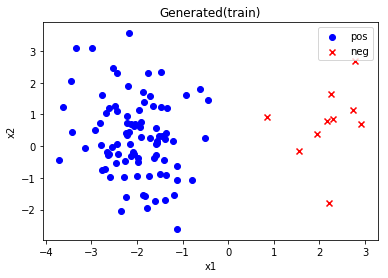

In [16]:
plotter.plot(X_train,y_train,title="Generated(train)")

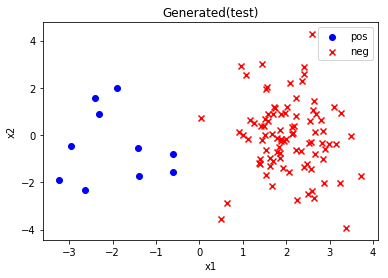

In [17]:
plotter.plot(X_test,y_test,title="Generated(test)")

In [18]:
cwlc=ClassWeightedLinearClassifier()
baseline=LinearLSClassifier()

In [19]:
cwlc.fit(X_train,y_train)
baseline.fit(X_train,y_train)

In [20]:
pred=cwlc.predict(X_test)

estimated pi: 0.168


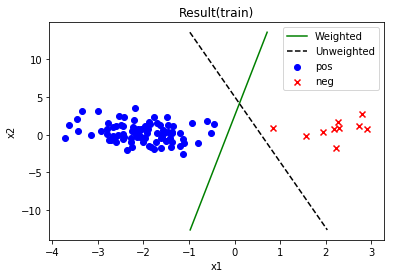

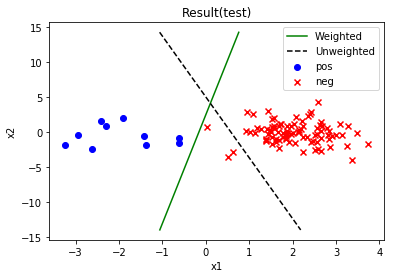

In [21]:
models=[{"theta":cwlc.theta,"model":"Weighted"},{"theta":baseline.theta,"model":"Unweighted"}]
plotter.plot(X_train,y_train,title="Result(train)",models=models)
plotter.plot(X_test,y_test,title="Result(test)",models=models)